In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons;

In [20]:
x , y = make_moons(n_samples=1000 ,noise=0.2)

In [21]:
df = {"x1":x[:,0] ,"x2": x[:,1],"y":y}

In [22]:
dataset = pd.DataFrame(df)

dataset.head(3)



,x1,x2,y
0,0.453396,0.578626,0
1,0.508886,-0.283428,1
2,0.299121,-0.418106,1


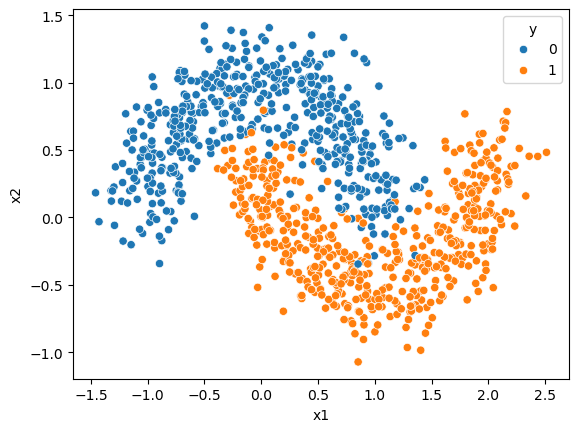

In [23]:
sns.scatterplot(x="x1" ,y="x2",data=dataset , hue="y")
plt.show()

In [24]:
x_a = dataset.iloc[ : , : -1]
y_a = dataset["y"]

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x_a , y_a , test_size=0.2 , random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
dt.score(x_test , y_test)*100 , dt.score(x_train ,y_train)*100

(96.0, 100.0)

In [33]:
sv = SVC()
sv.fit(x_train , y_train)
sv.score(x_test , y_test)*100 , sv.score(x_train ,y_train)*100

(98.5, 97.25)

In [34]:
gnb = GaussianNB()
gnb.fit(x_train , y_train)
gnb.score(x_test , y_test)*100 , gnb.score(x_train ,y_train)*100

(88.5, 86.125)

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
li = [("dt1" ,DecisionTreeClassifier()) , ("sv1", SVC()) ,("gnb1" ,GaussianNB())]

In [37]:
vc = VotingClassifier(li)
vc.fit(x_train , y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [38]:
vc.score(x_train , y_train)*100 , vc.score(x_test , y_test)*100

(98.0, 97.0)